# How it works - Visualization with Seaborn

* Author: Cleiber Garcia
* Version's date: March, 2023

* Pourpose: Develop competencies on how visualization with Python Seaborn works

* This Notebook was produced as part of my studies of the course 'Python for Data Science and Machine Learning Bootcamp', taught by Mr Jose Portilla, Head of Data Science at Pierian Training. The course is offered ad Udemy (https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/learn/lecture/5784218?start=15#overview). 

* Although the degree of similarity between this notebook and the notebook written by Jose Portillo for this course is almost 100%, I assure you that I wrote it line by line. Also, I took the liberty to make some changes in order to clariry some examples or to make code more readable, when I judged it apropriate.

* For more information, please contact me at cleiber.garcia@gmail.com

# Summary
* 1. Distribution Plots
* 2. Categorical Plots
* 3. Matrix Plots
* 4. Grids Plots
* 5. Regression Plots
* 6. Style and Color

# 1. Distribution Plots
Let's work some plots that allow us to visualize the distribution of a data set:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

## Import Python Modules

In [3]:
import seaborn as sns
import matplotlib.pyplot
%matplotlib inline

## Working Data

In [5]:
# Seaborn's built-in data set
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## 1.1 distplot
The distplot shows the distribution of a univariate set of observations.

D:\Instaladores\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

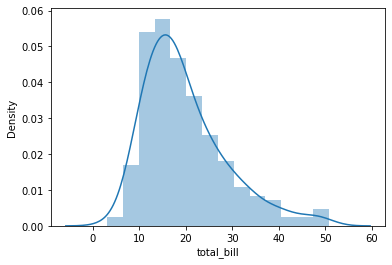

In [14]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

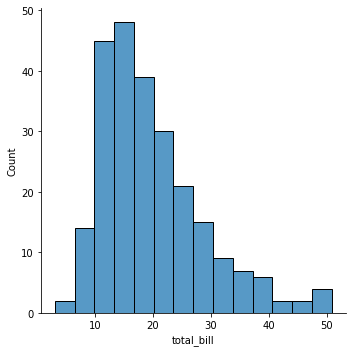

In [12]:
sns.displot(tips['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

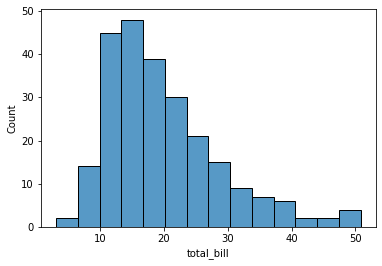

In [13]:
sns.histplot(tips['total_bill'])

## 1.2 jointplot
jointplot() allows us to basically match up two distplots for bivariate data. With our choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

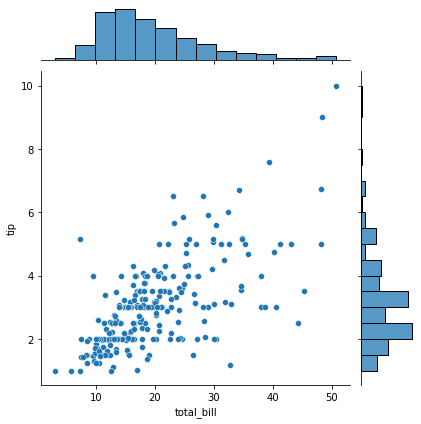

In [17]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

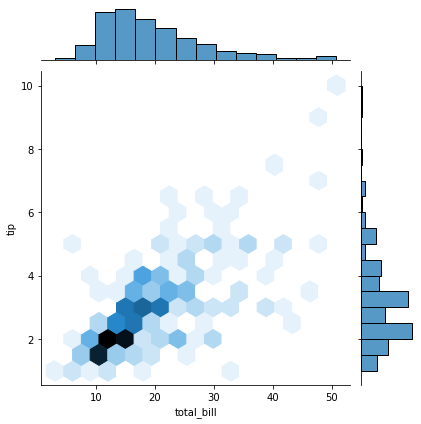

In [18]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

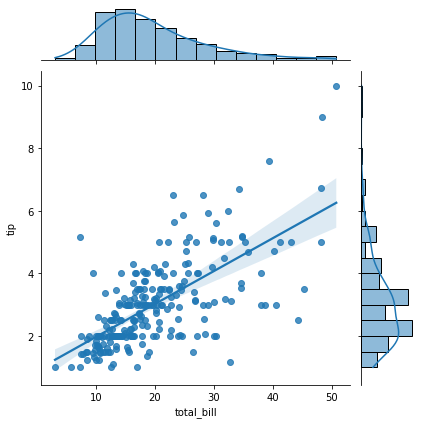

In [19]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## 1.3 pairplot
pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

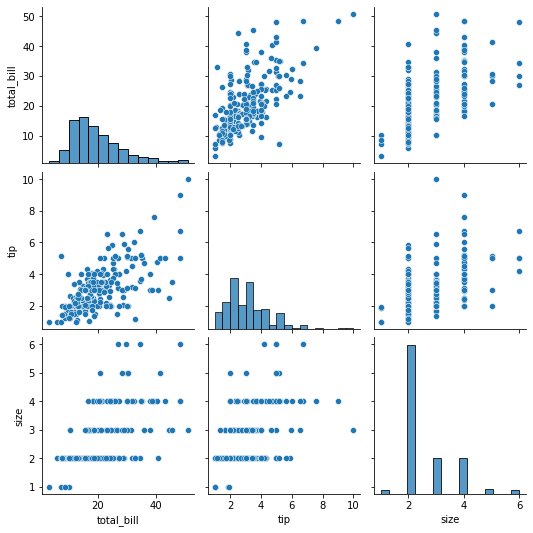

In [21]:
sns.pairplot(tips)

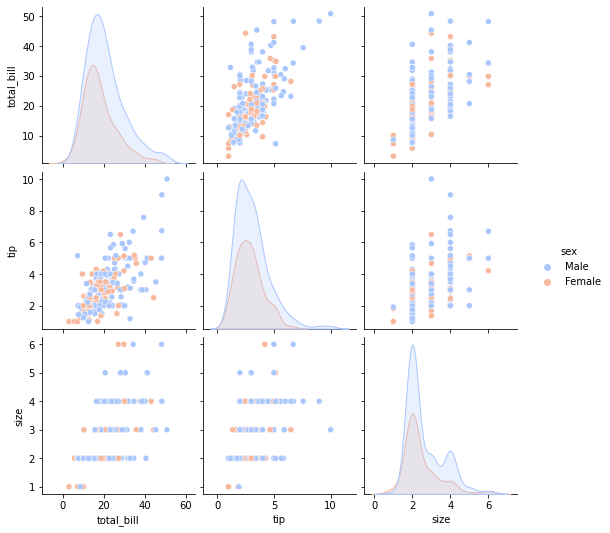

In [22]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## 1.4 rugplot
rugplots draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot

<AxesSubplot:xlabel='total_bill'>

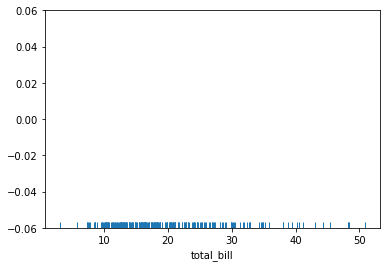

In [23]:
sns.rugplot(tips['total_bill'])

## 1.5 kdeplot
kdeplots are Kernel Density Estimation plots. These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value.

(0.0, 1.0)

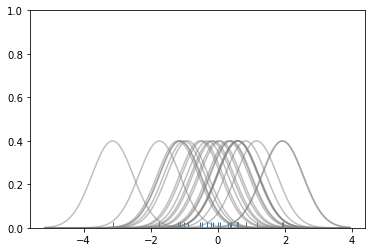

In [25]:
# This code it's for generating the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

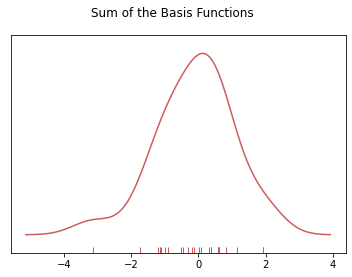

In [27]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

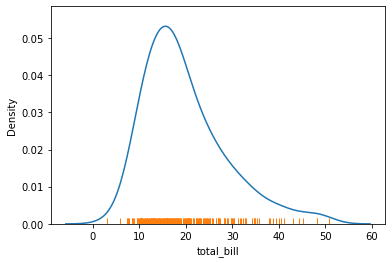

In [28]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

<AxesSubplot:xlabel='tip', ylabel='Density'>

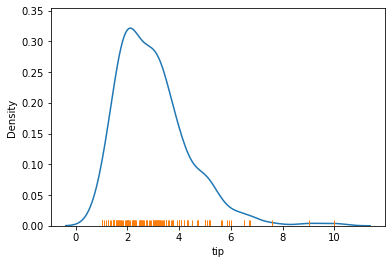

In [29]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# 2. Categorical Plots
Now let's work with some plots for categorical data:

* 1. barplot and countplot
* 2. boxplot violinplot
* 3. stripplot and swarmplot
* 4. factorplot (renamed catplot)

#### Importing Modules and Prepareing Working Data

In [11]:
import numpy as np
import seaborn as sns
%matplotlib inline

In [12]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2.1. barplot and countplot
These very similar plots allos us to get aggregate data off a categorical feature in our data. 

### 2.1.1 barplot
**barplot** is a general plot that allows us to aggregate the categorical data based off some function, by default the mean

[Text(0.5, 1.0, 'average (mean) of total_bill')]

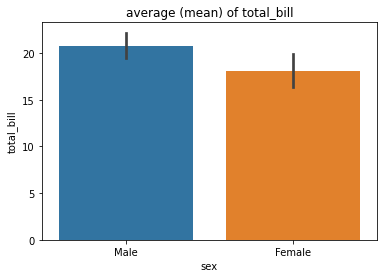

In [17]:
# Shows average (by default) total bill by sex
sns.barplot(x='sex',y='total_bill',data=tips).set(title='average (mean) of total_bill')

[Text(0.5, 1.0, 'std of total_bill')]

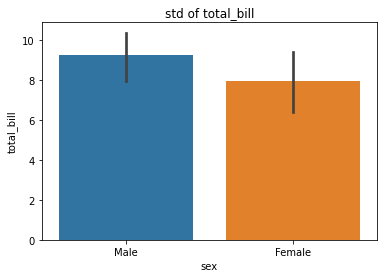

In [18]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std).set(title='std of total_bill')

### 2.1.2 countplot

[Text(0.5, 1.0, 'qty of tips by sex')]

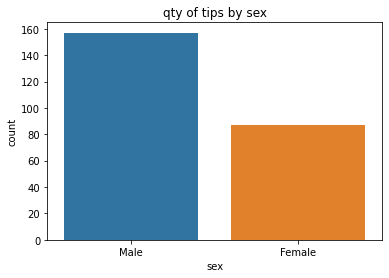

In [21]:
# Shows the quantity of tips by sex
sns.countplot(x='sex',data=tips).set(title='qty of tips by sex')

## 2.2. boxplot violinplot
boxplots and violinplots are used to shown the distribution of categorical data. 

### 2.2.1 boxplot
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way 
that facilitates comparisons between variables or across levels of a categorical variable. 
The box shows the quartiles of the dataset while the whiskers extend to show the rest of 
the distribution, except for points that are determined to be “outliers” using a method 
that is a function of the inter-quartile range.

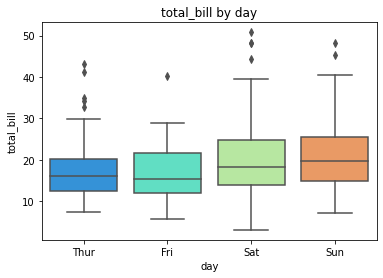

In [37]:
# Shows total bill by day
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow').set(title='total_bill by day');

<AxesSubplot:>

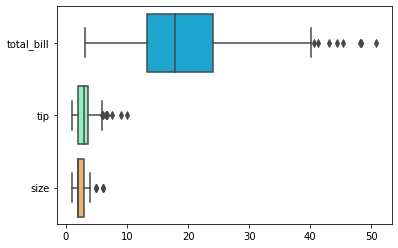

In [28]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

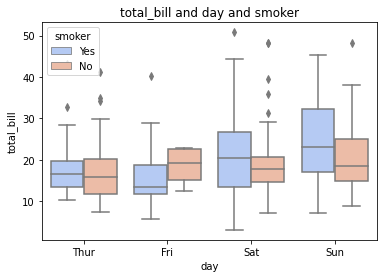

In [40]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm").set(title='total_bill and day and smoker');

### 2.2.2 violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution

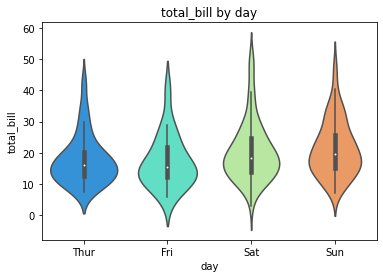

In [36]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow').set(title='total_bill by day');

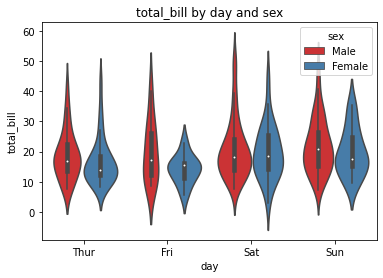

In [42]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1').set(title='total_bill by day and sex');

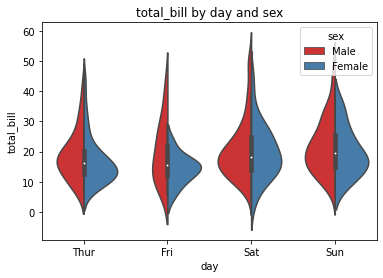

In [44]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1').set(title='total_bill by day and sex');

## 2.3. stripplot and swarmplot

### 2.3.1 stripplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where we want to show all observations along with some representation of the underlying distribution

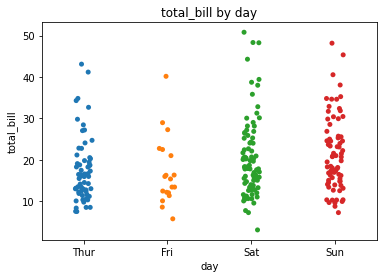

In [48]:
# Shows total_bill by day
sns.stripplot(x="day", y="total_bill", data=tips).set(title='total_bill by day');

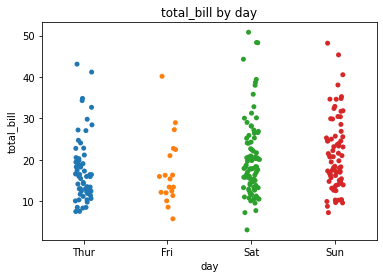

In [60]:
# Shows total_bill by day
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True).set(title='total_bill by day');

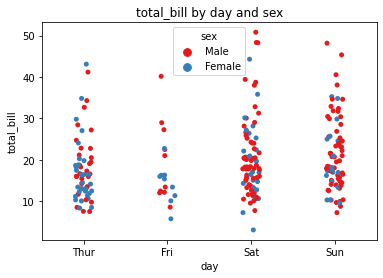

In [62]:
# Shows total_bill by day and sex
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1').set(title='total_bill by day and sex');

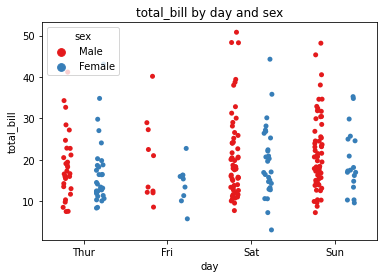

In [70]:
# Shows total_bill by day and sex (instead of split parameter I used dodge)
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',
              dodge=True).set(title='total_bill by day and sex');

### 2.3.2 swarmplot
The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

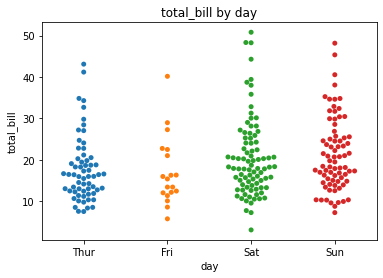

In [74]:
# Shows total_bill by day
sns.swarmplot(x="day", y="total_bill", data=tips).set(title='total_bill by day');

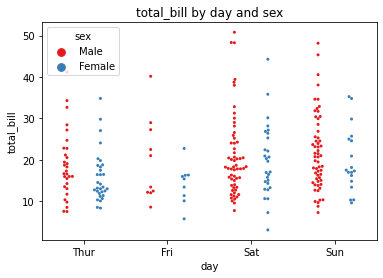

In [80]:
# Shows total_bill by day and sex (instead of split parameter I used dodge)
# I also used size parameter to be able to whow all points
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", 
              dodge=True, size=3).set(title='total_bill by day and sex');

### 2.3.3 combining stripplot and swarmplot

[Text(0.5, 1.0, 'total tip and day')]

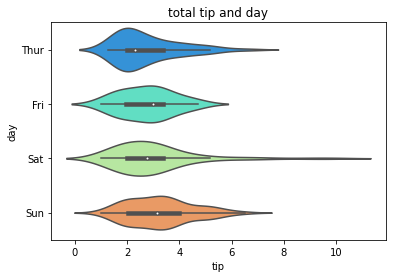

In [88]:
# Shows total tip and day
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow').set(title='total tip and day')

<AxesSubplot:xlabel='tip', ylabel='day'>

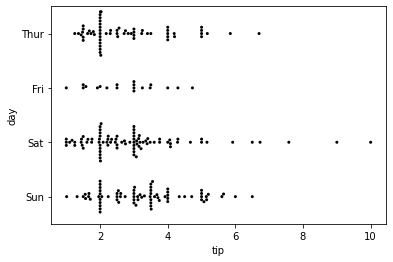

In [86]:
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

<AxesSubplot:title={'center':'total tip and day'}, xlabel='tip', ylabel='day'>

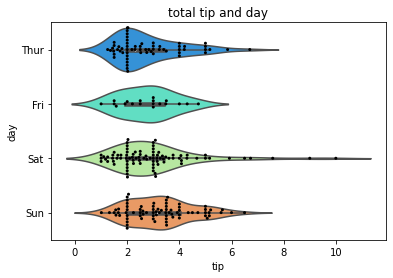

In [89]:
# Combining stripplot and swarmplot
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow').set(title='total tip and day')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

## 2.4. factorplot (renamed catplot)
factorplot (renamed catplot) is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type

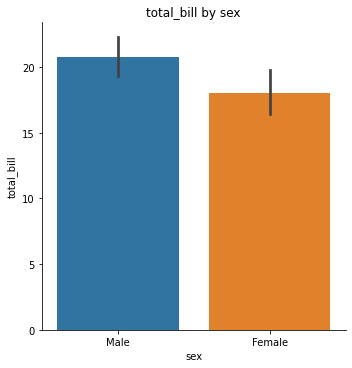

In [93]:
# Shows total_bill by sex
sns.catplot(x='sex',y='total_bill',data=tips,kind='bar').set(title='total_bill by sex');

# 3. Matrix Plots
Matrix plots allow us to plot data as color-encoded matrices and can also be used to indicate clusters within the data

### Importing Python Modules

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
# Load file data set
flights = sns.load_dataset('flights')

In [107]:
# Load tipos data set
tips = sns.load_dataset('tips')

In [108]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [109]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [111]:
flights.shape

(144, 3)

In [113]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [114]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [116]:
tips.shape

(244, 7)

## 3.1 Heatmap

In order for a heatmap to work properly, our data should already be in a matrix form, the sns.heatmap function basically just colors it in for us

### 3.1.1 Heatmap for tips Data Set

In [118]:
# Shows first five lines of tips data set
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [119]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


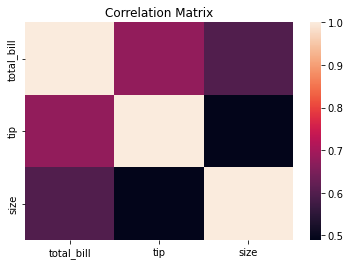

In [123]:
# Shows heat map for the matrix correlation of numeric value in tips data set
sns.heatmap(tips.corr()).set(title='Correlation Matrix');

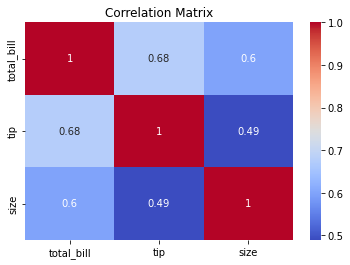

In [124]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True).set(title='Correlation Matrix');

### 3.1.2 Heatmap for flights Data Set

In [127]:
# Shows five first rows of flights data set
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [128]:
# Matrix form for correlation data
flights.corr()

,year,passengers
year,1.000000,0.921824
passengers,0.921824,1.000000


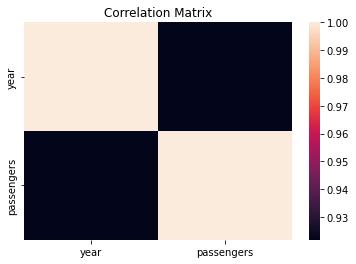

In [129]:
# Shows heat map for the matrix correlation of numeric value in flights data set
sns.heatmap(flights.corr()).set(title='Correlation Matrix');

In [135]:
# Creates a pivot table for passengers, month and year
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
pvflights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


[Text(0.5, 1.0, 'Number of Flights for Month and Year')]

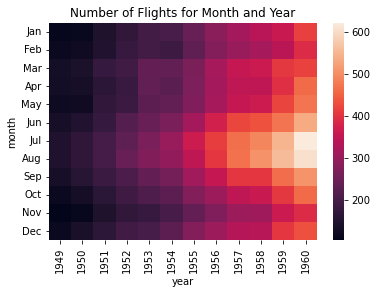

In [136]:
sns.heatmap(pvflights).set(title='Number of Flights for Month and Year')

[Text(0.5, 1.0, 'Number of Flights for Month and Year')]

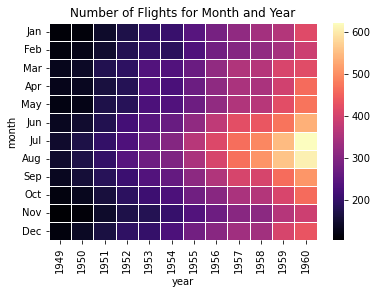

In [138]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1).set(title='Number of Flights for Month and Year')

## 3.2 clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap

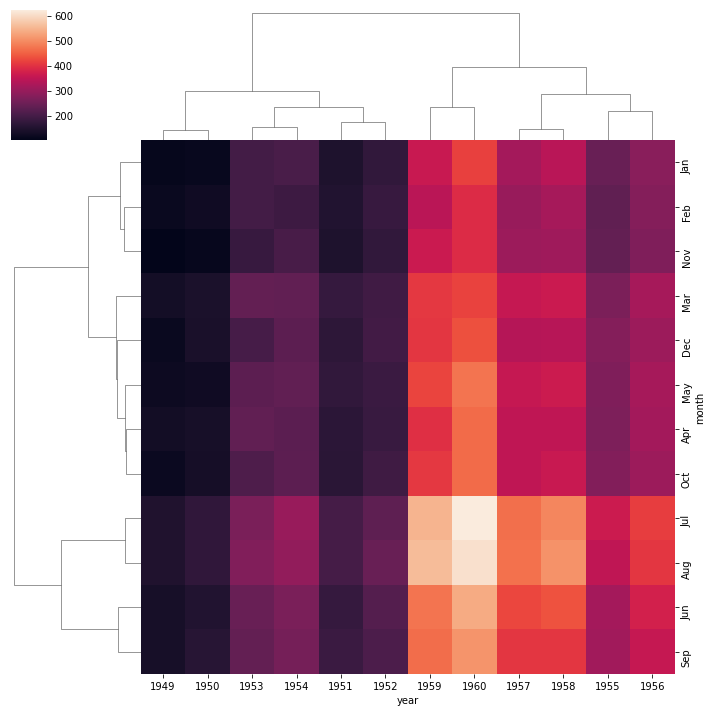

In [141]:
# Shows a cluster map for flights data set
sns.clustermap(pvflights);

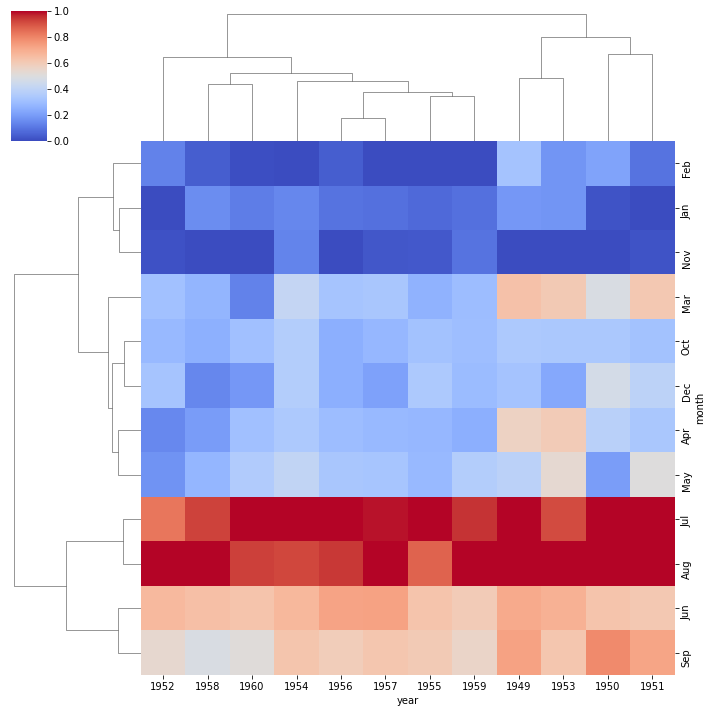

In [143]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1);

# 4. Grids Plots
Grids are general types of plots that allow us to map plot types to rows and columns of a grid, this helps us create similar plots separated by features.

#### Import Python Modules

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Load Working Data Set

In [148]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [149]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [150]:
iris.shape

(150, 5)

## 4.1 PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset

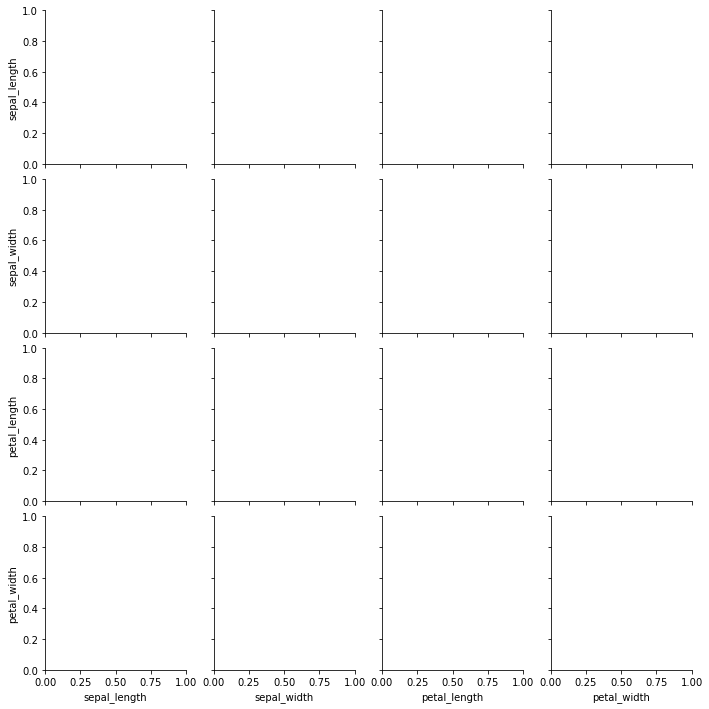

In [152]:
# Just the Grid
sns.PairGrid(iris)

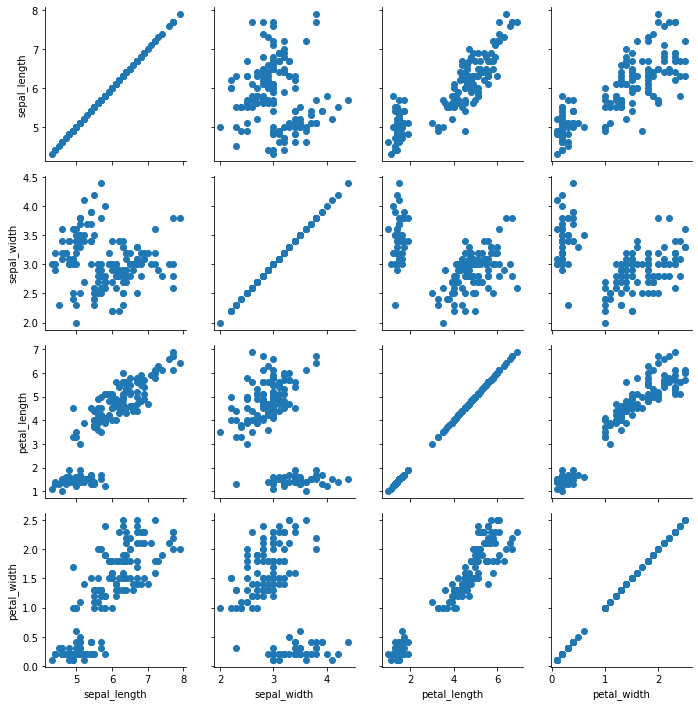

In [154]:
# Then we map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter);

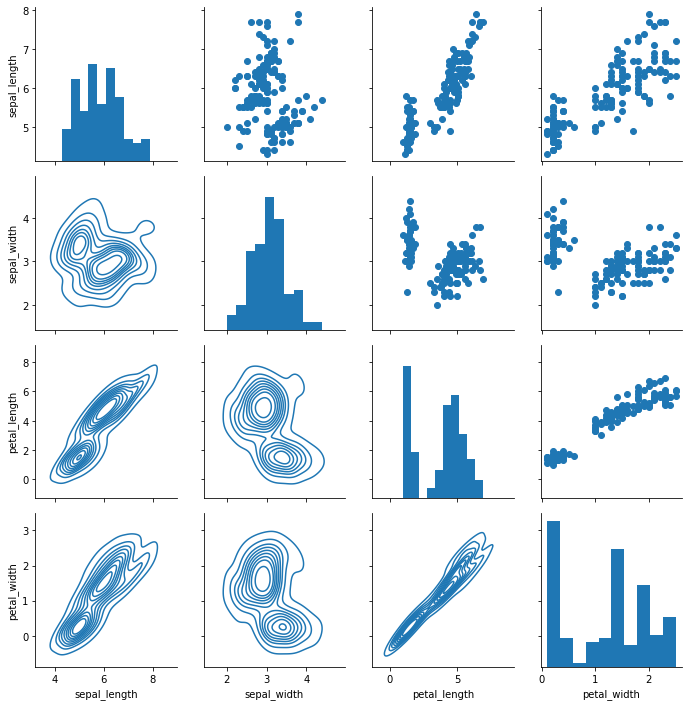

In [155]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## 4.2 pairplot

pairplot is a simpler version of PairGrid

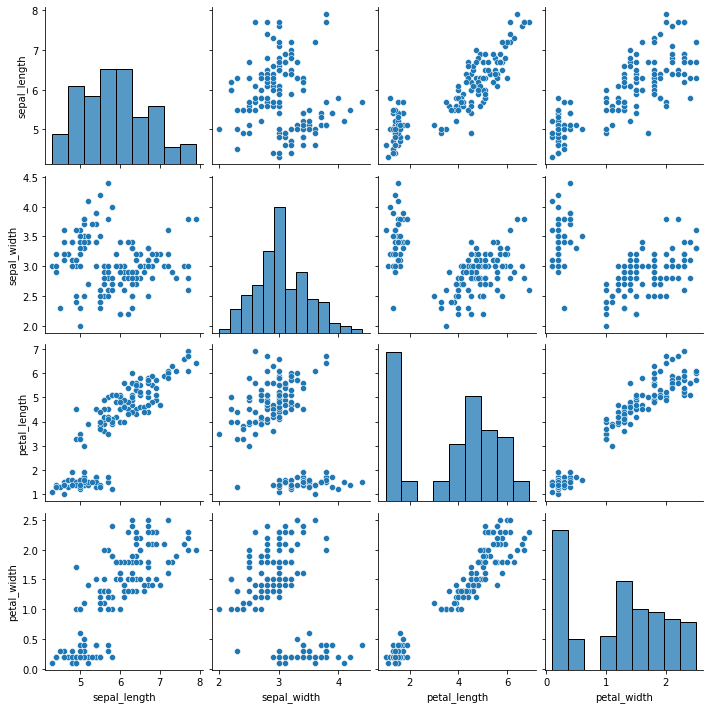

In [156]:
sns.pairplot(iris)

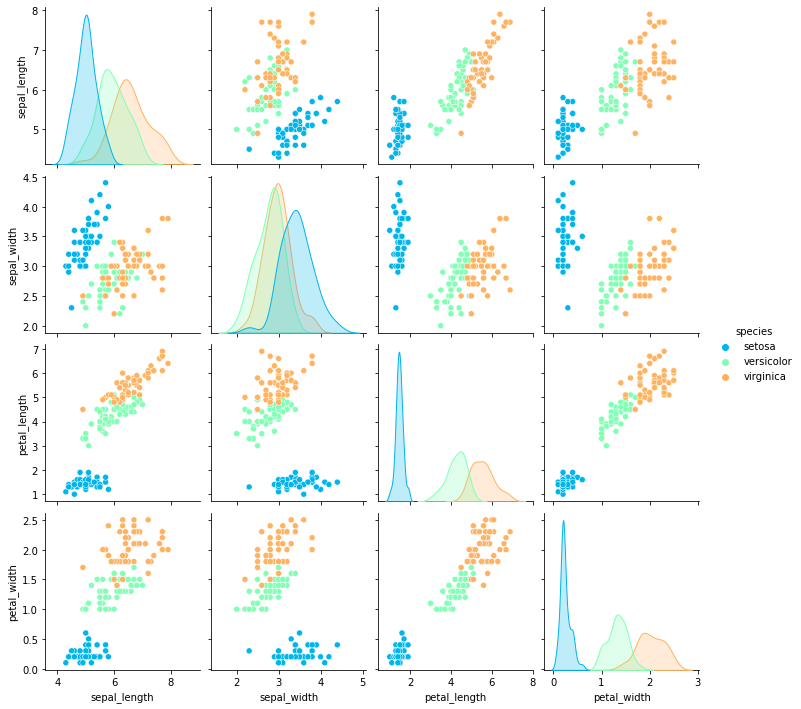

In [157]:
sns.pairplot(iris,hue='species',palette='rainbow')

## 4.3 Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature

In [160]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


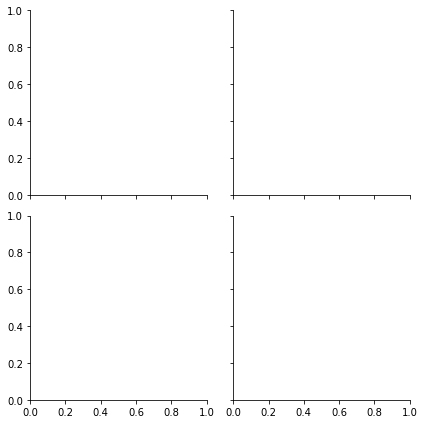

In [161]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

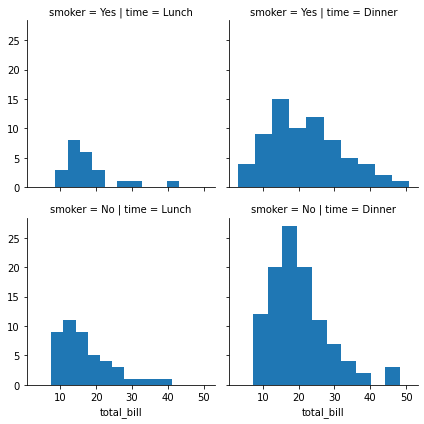

In [165]:
# Shows total_bill and smokers during lunch and dinner
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

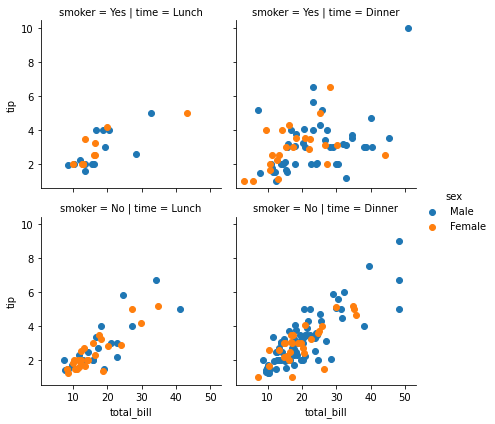

In [167]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

## 4.4 JointGrid

JointGrid is the general version for jointplot() type grids

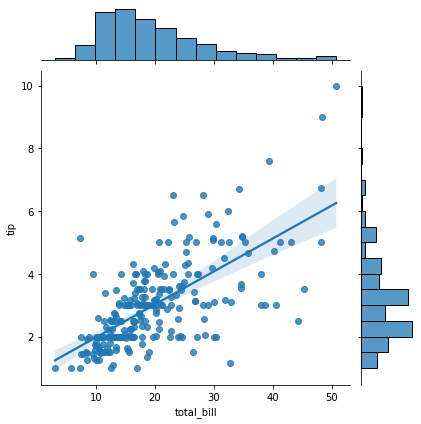

In [173]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.histplot)

# 5. Regression Plots

### Import Python Modules and Set Working Data

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4



## 5.1 Implot

**lmplot** allows us to display linear models, but it also conveniently allows us to split up those plots based off of features, as well as coloring the hue based off of features.

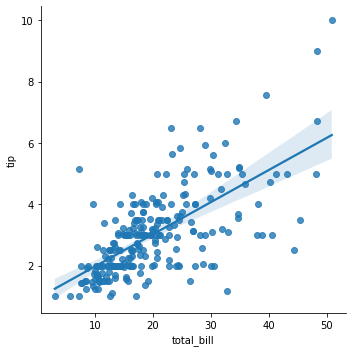

In [180]:
# Regression graph of total_bill and tip
sns.lmplot(x='total_bill',y='tip',data=tips)

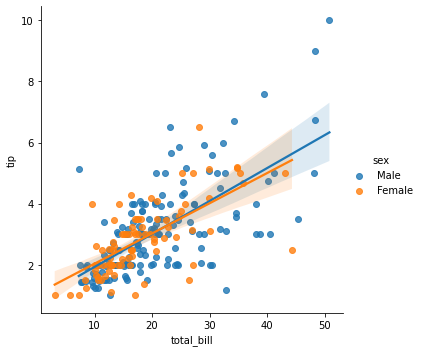

In [182]:
# Regression graph of total_bill and tip and sex
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

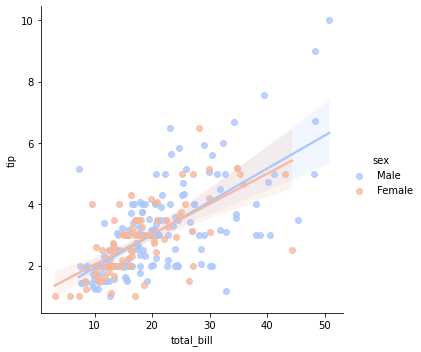

In [185]:
# Regression graph of total_bill and tip and sex
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

### Working with Markers

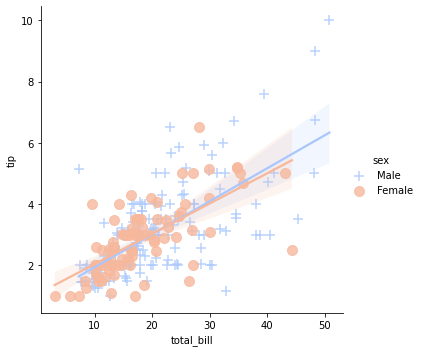

In [192]:
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['+','o'],scatter_kws={'s':100})

### Using a Grid

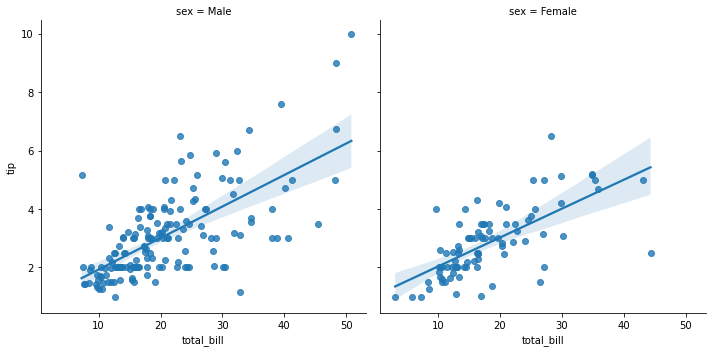

In [193]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

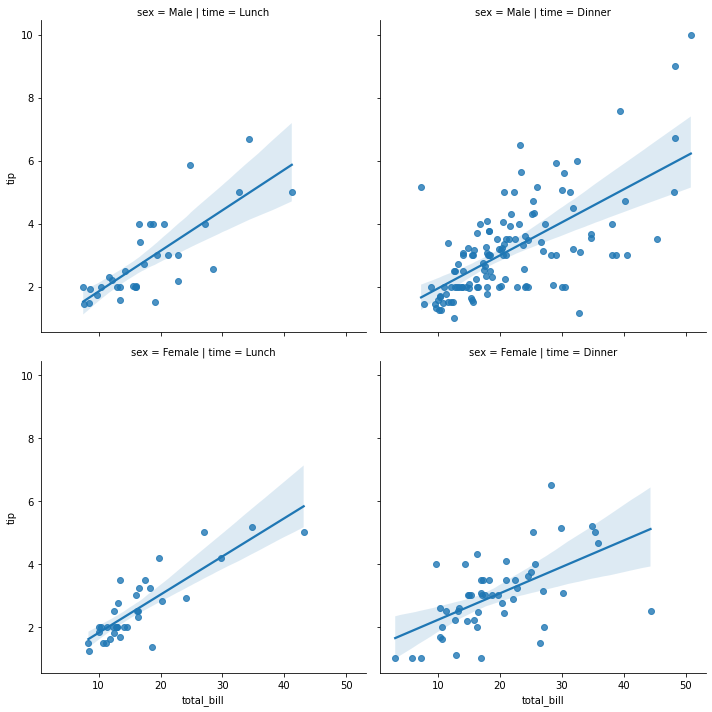

In [200]:
# Plot a grid with regression of total_bill and tip, showing time and sex
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

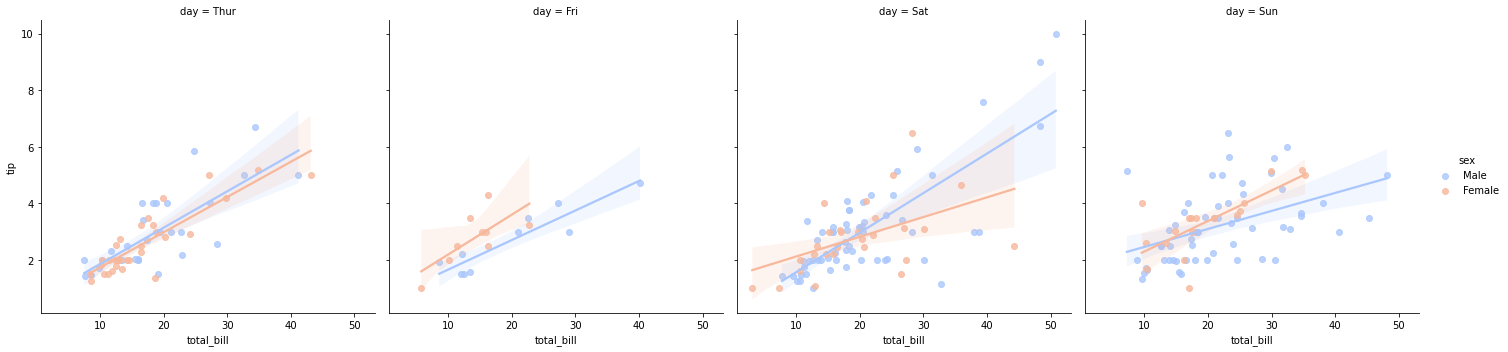

In [199]:
# Plot a grid with regression of total_bill and tip, showing day and sex
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

### Aspect and Hight
Seaborn figures can have their hight and aspect ratio adjusted with the size and aspect parameters

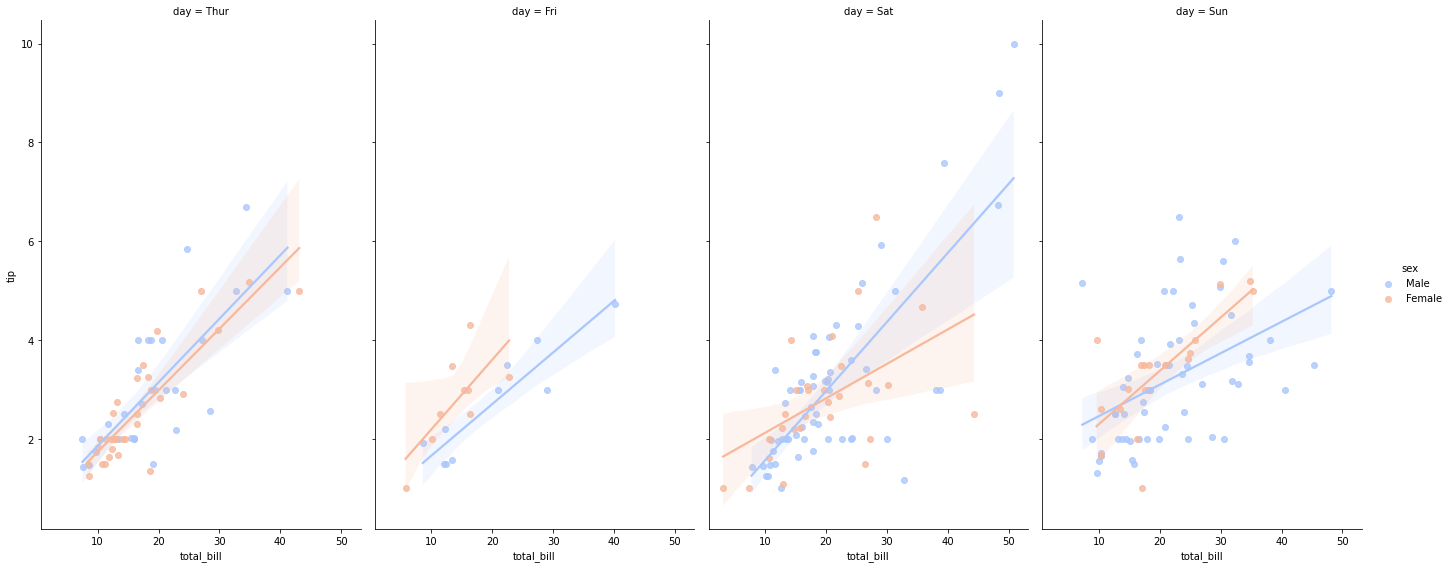

In [204]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,height=8)

# 6. Style and Color

Let's see how to control figure aesthetics in seaborn

### Import Python Modules

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Set Working Data Set

In [207]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 6.1 Styles

We can set particular styles

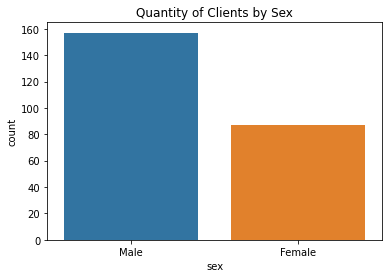

In [212]:
# Shows quantitity of clients by sex
sns.countplot(x='sex',data=tips).set(title='Quantity of Clients by Sex');

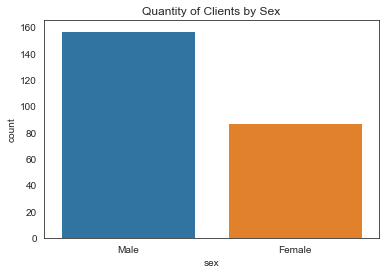

In [214]:
# Shows quantitity of clients by sex
sns.set_style('white')
sns.countplot(x='sex',data=tips).set(title='Quantity of Clients by Sex');

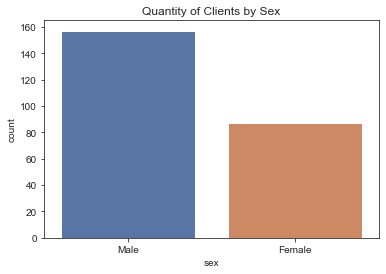

In [216]:
# Shows quantitity of clients by sex
sns.set_style('ticks')
sns.countplot(x='sex',data=tips,palette='deep').set(title='Quantity of Clients by Sex');

## 6.2 Spine Removal

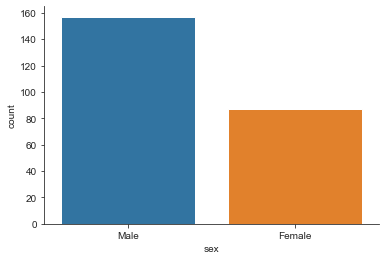

In [222]:
# Showing quantity of clients by sex (with spine removal)
sns.countplot(x='sex',data=tips)
sns.despine()

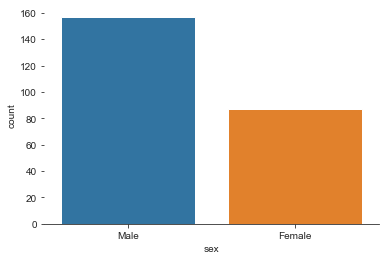

In [224]:
# Showing quantity of clients by sex (with spine removal)
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

<AxesSubplot:xlabel='sex', ylabel='count'>

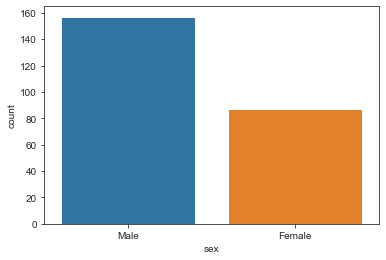

In [220]:
# Showing quantity of clients by sex
sns.countplot(x='sex',data=tips)
#sns.despine()

## 6.3 Height and Aspect

We can use matplotlib's **plt.figure(figsize=(width,height) ** to change the size of most seaborn plots.

We can control the size and aspect ratio of most seaborn grid plots by passing in parameters: size (height), and aspect

<AxesSubplot:xlabel='sex', ylabel='count'>

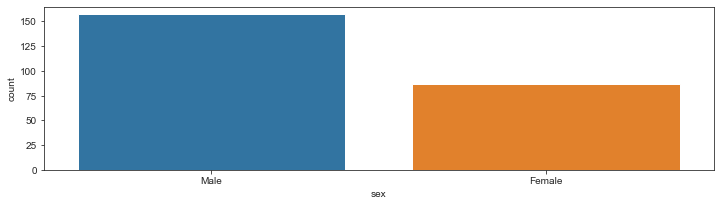

In [226]:
# Non Grid Plot
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

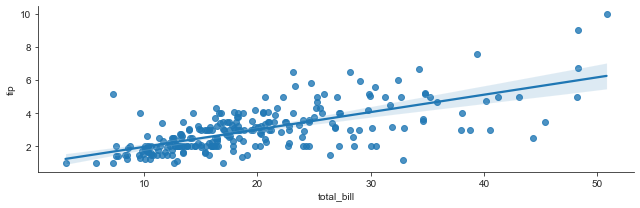

In [232]:
# Grid Type Plot
sns.lmplot(x='total_bill',y='tip',height=3,aspect=3,data=tips)

## 6.4 Scale and Context

The set_context() allows us to override default parameters

<AxesSubplot:xlabel='sex', ylabel='count'>

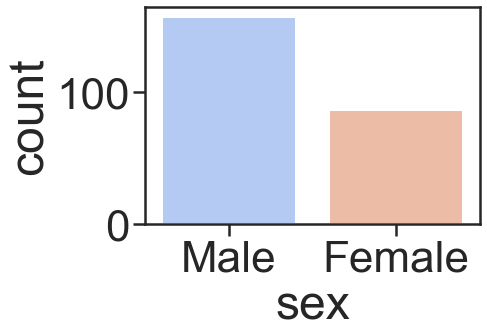

In [237]:
sns.set_context('poster',font_scale=2)
sns.countplot(x='sex',data=tips,palette='coolwarm')